<a href="https://colab.research.google.com/github/MarcusValle/marcus_data_science/blob/main/Projeto_Sigmoidal_01_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Chicago (EUA)*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Chicago (EUA), e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

In [1]:
#importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/il/chicago/2022-09-14/visualisations/listings.csv")

## Análise dos Dados

**Dicionário das variáveis**

* id - identificação gerada para o imóvel 
* name - nome da hospedagem 
* host_id - número de identificação do proprietário do imóvel
* host_name - nome do proprietário
* neighbourhood_group - zona do bairro
* neighbourhood - bairro
* latitude - coordenada de latitude do imóvel
* longitude - coordenada de longitude do imóvel
* room_type - tipo de hospedagem oferecida
* price - preço da hospedagem por noite (US$)
* minimum_nights - número mínimo de dias de estadias para reserva
* number_of_reviews - número de avaliações que a propriedade possui
* last_review - última avaliação dada
* reviews_per_month - número de avaliações por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
#mostrar as 5 primeiras entradas

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Hyde Park - Walk to UChicago,2613,Rebecca,NaN,Hyde Park,41.787900,-87.587800,Private room,110,3,207,2022-09-09,2.21,1,320,19,R17000015609
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.901660,-87.680210,Entire home/apt,91,2,459,2022-08-28,2.86,1,320,51,R21000075737
2,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.911960,-87.639810,Entire home/apt,157,4,56,2022-08-23,0.55,9,137,23,2209984
3,12140,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.923570,-87.649470,Private room,329,2,13,2022-09-12,0.15,1,165,6,R20000055258
4,24833,Prime LincolnPark 1 Block Fullerton Express L ...,101521,Red,NaN,Lincoln Park,41.925961,-87.656364,Entire home/apt,86,32,40,2022-04-23,0.27,3,306,2,City registration pending


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
df.shape



(7414, 18)

In [5]:
# quais os tipos das variáveis
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [6]:
# verificar as 5 primeiras entradas do dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Hyde Park - Walk to UChicago,2613,Rebecca,NaN,Hyde Park,41.787900,-87.587800,Private room,110,3,207,2022-09-09,2.21,1,320,19,R17000015609
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.901660,-87.680210,Entire home/apt,91,2,459,2022-08-28,2.86,1,320,51,R21000075737
2,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.911960,-87.639810,Entire home/apt,157,4,56,2022-08-23,0.55,9,137,23,2209984
3,12140,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.923570,-87.649470,Private room,329,2,13,2022-09-12,0.15,1,165,6,R20000055258
4,24833,Prime LincolnPark 1 Block Fullerton Express L ...,101521,Red,NaN,Lincoln Park,41.925961,-87.656364,Entire home/apt,86,32,40,2022-04-23,0.27,3,306,2,City registration pending


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.176963
last_review                       0.176963
license                           0.170758
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

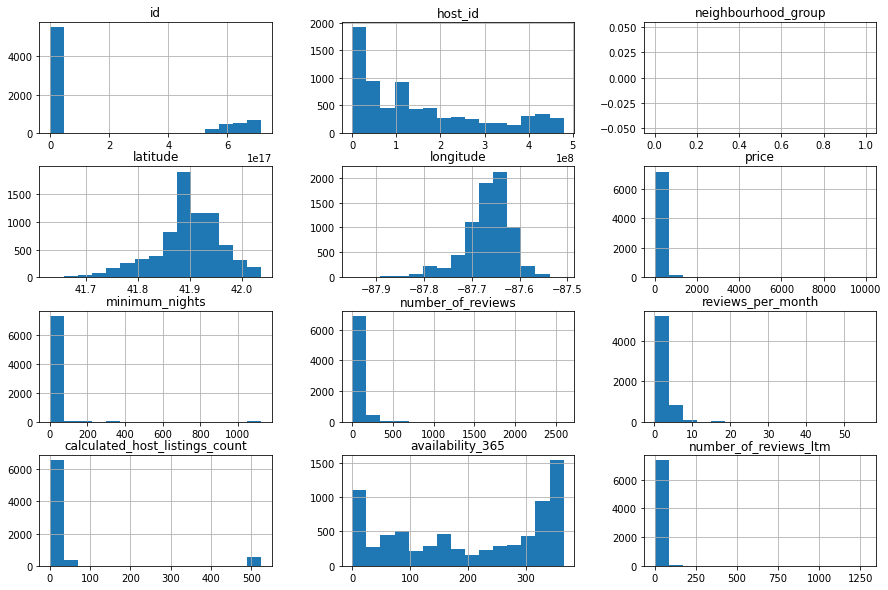

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [9]:
# ver a média da coluna `price``
df.price.mean()

211.69476665767468

In [ ]:
x=(df.price.sum()/df.shape[0])
x

211.69476665767468

### **Q5. Há outliers presentes?**

In [10]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7414.000000,7414.000000,7414.000000,6102.000000,7414.000000,7414.000000
mean,211.694767,14.580388,46.316968,1.986147,44.548692,200.869706
std,288.524481,41.305189,82.506890,1.936698,133.163519,132.220453
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,93.000000,2.000000,2.000000,0.560000,1.000000,74.000000
50%,150.000000,2.000000,14.000000,1.600000,3.000000,222.000000
75%,237.000000,32.000000,55.000000,2.970000,12.000000,333.000000
max,10000.000000,1125.000000,2600.000000,55.710000,525.000000,365.000000


* A variável `price` possui 75% do valor abaixo de 237, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano (1125).

### Boxplot para minimum_nights

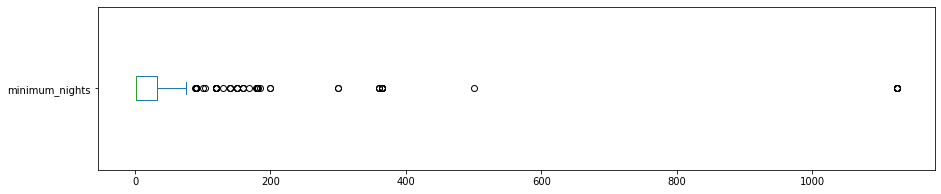

minimum_nights: valores acima de 30:
2329 entradas
31.4135%
Pelos resultados acima, mais de 30% das propriedades disponíveis pela Airbnb são para longa estadia


In [12]:
df.minimum_nights.plot(kind='box',vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights>30])))
print("{:.4f}%".format((len(df[df.minimum_nights>30])/df.shape[0])*100))
print("Pelos resultados acima, mais de 30% das propriedades disponíveis pela Airbnb são para longa estadia")

### *Boxplot para price*

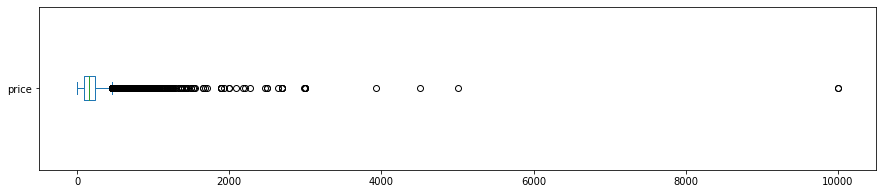

price: valores acima de US$ 237:
1848 entradas
24.9258%


In [13]:
df.price.plot(kind='box',vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de US$ 237 para price
print("price: valores acima de US$ 237:")
print("{} entradas".format(len(df[df.price>237])))
print("{:.4f}%".format((len(df[df.price>237])/df.shape[0])*100))

### *Histograma sem os outliers*

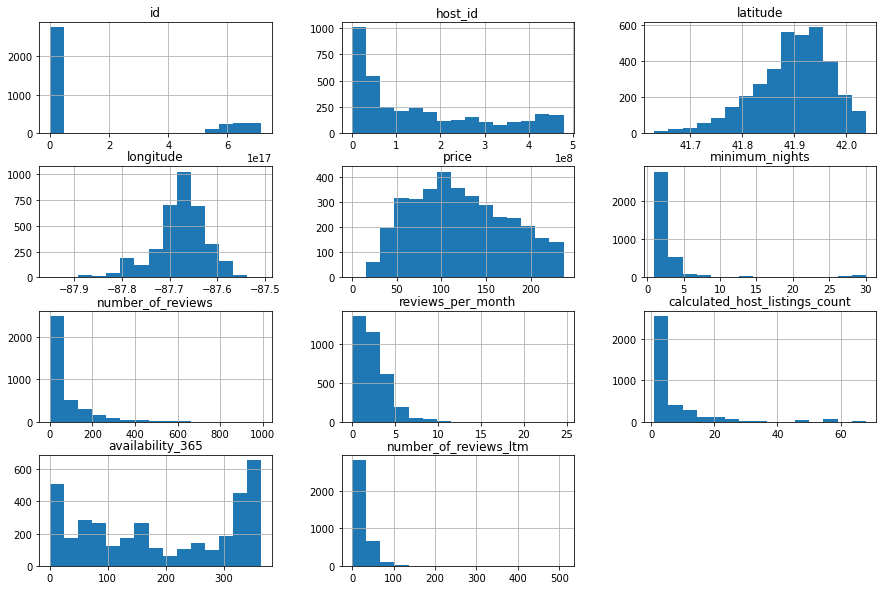

In [14]:
#removendo os outliers e criando um novo DataFrame sem os outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price>237].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights>30].index, axis=0, inplace=True)

#removendo a coluna `neighbourhood_group`, pois está vazia
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotando o histograma com as novas variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q6. Qual a correlação existente entre as variáveis**

In [15]:
# criar uma matriz de correlação
mat_corr = df_clean[['price', 'minimum_nights','number_of_reviews','reviews_per_month',
                     'calculated_host_listings_count', 'availability_365']].corr()

display(mat_corr)

# mostrar a matriz de correlação

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.080005,-0.015114,0.097587,-0.048521,0.033754
minimum_nights,-0.080005,1.000000,-0.094770,-0.238108,-0.034295,-0.001315
number_of_reviews,-0.015114,-0.094770,1.000000,0.507268,-0.099523,-0.026916
reviews_per_month,0.097587,-0.238108,0.507268,1.000000,-0.009854,0.076166
calculated_host_listings_count,-0.048521,-0.034295,-0.099523,-0.009854,1.000000,0.188934
availability_365,0.033754,-0.001315,-0.026916,0.076166,0.188934,1.000000


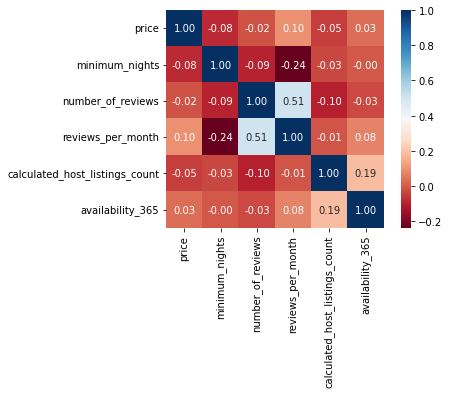

In [16]:
# plotar um heatmap a partir das correlações
sns.heatmap(mat_corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True );

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [17]:
# mostrar a quantidade de cada tipo de imóvel disponível em Chicago
df_clean.room_type.value_counts()

Entire home/apt    2412
Private room       1118
Shared room          64
Hotel room           16
Name: room_type, dtype: int64

In [18]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.668144
Private room       0.309695
Shared room        0.017729
Hotel room         0.004432
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara de Chicago?**

In [20]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20]

neighbourhood
Burnside           200.000000
Loop               163.081081
Clearing           158.000000
Near South Side    158.000000
Riverdale          158.000000
Lincoln Park       151.789474
Near North Side    149.456376
Morgan Park        148.555556
North Center       145.245902
Ashburn            137.181818
Lake View          137.098182
West Town          135.658120
Douglas            134.301887
Forest Glen        133.916667
Avondale           133.679487
Fuller Park        133.000000
Logan Square       132.526316
Pullman            132.500000
Chatham            131.666667
Auburn Gresham     127.875000
Name: price, dtype: float64

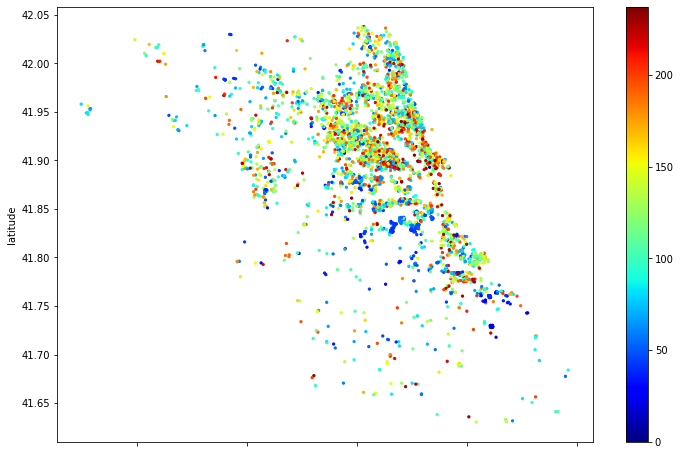

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=1, c=df_clean['price'], s=5,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**


In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.956786703601108

## Conclusões

Os dados fornecidos possuem uma alta incidência de outliers, foi necessário tirar dos dados os outliers. Não há muita correlação entre os atributos, exceto o número de comentários x quantidades de comentários por mês.

Para a cidade de Chicago, os hóspedes preferem alugar um apartamento/casa inteira, com mais de 66% de incidência.

Dentre os bairros citados, o Burnside possui os maiores valores de diárias, apesar de ser um bairro a ser evitado por causa da violência, conforme reportagem do site https://estatousa.com/pt-pt/os-dez-bairros-de-chicago-mais-perigosos/

Entretanto, os resultados estão coerentes quando citamos, por exemplo, os bairros Pullman, Fuller Park e Chatham, que devido à alta incidência de violência, possuem os menores valores de diárias.
